In [82]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import math
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.manual_seed(1122)

Using cuda device


In [83]:
theta = [0.1, 1, 1.8, 2]

def gaussian(x, mu):
    return (1 / (0.3 * math.sqrt(2 * math.pi))) * (math.e ** ((-1/2) * (((x - mu) / 0.3)) ** 2))

def gaussian_mixture(x):
    return gaussian(x, theta[0]) + gaussian(x, theta[1]) + gaussian(x, theta[2]) + gaussian(x, theta[3])


In [84]:
class SmallNN(nn.Module):
    def __init__(self):
        super(SmallNN, self).__init__()
        self.lin1 = nn.Linear(1, 4)
        self.lin2 = nn.Linear(4, 8)
        self.lin3 = nn.Linear(8, 4)
        self.lin4 = nn.Linear(4, 1)
    
    def forward(self, x):
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = torch.relu(self.lin3(x))
        return self.lin4(x)

model = SmallNN().to(device)
L = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
model, device

(SmallNN(
   (lin1): Linear(in_features=1, out_features=4, bias=True)
   (lin2): Linear(in_features=4, out_features=8, bias=True)
   (lin3): Linear(in_features=8, out_features=4, bias=True)
   (lin4): Linear(in_features=4, out_features=1, bias=True)
 ),
 'cuda')

In [85]:
epochs = 30000

X = torch.randn(1000, 1).to(device)
Y = gaussian_mixture(X).to(device)

for e in range(epochs):
    y_pred = model(X)
    loss = L(y_pred, Y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e + 1) % 100 == 0:
        print(f"Epoch [{e+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/30000], Loss: 0.3061
Epoch [200/30000], Loss: 0.1461
Epoch [300/30000], Loss: 0.0954
Epoch [400/30000], Loss: 0.0858
Epoch [500/30000], Loss: 0.0831
Epoch [600/30000], Loss: 0.0814
Epoch [700/30000], Loss: 0.0799
Epoch [800/30000], Loss: 0.0788
Epoch [900/30000], Loss: 0.0779
Epoch [1000/30000], Loss: 0.0770
Epoch [1100/30000], Loss: 0.0763
Epoch [1200/30000], Loss: 0.0755
Epoch [1300/30000], Loss: 0.0748
Epoch [1400/30000], Loss: 0.0741
Epoch [1500/30000], Loss: 0.0735
Epoch [1600/30000], Loss: 0.0728
Epoch [1700/30000], Loss: 0.0721
Epoch [1800/30000], Loss: 0.0715
Epoch [1900/30000], Loss: 0.0708
Epoch [2000/30000], Loss: 0.0701
Epoch [2100/30000], Loss: 0.0694
Epoch [2200/30000], Loss: 0.0687
Epoch [2300/30000], Loss: 0.0680
Epoch [2400/30000], Loss: 0.0671
Epoch [2500/30000], Loss: 0.0662
Epoch [2600/30000], Loss: 0.0651
Epoch [2700/30000], Loss: 0.0641
Epoch [2800/30000], Loss: 0.0632
Epoch [2900/30000], Loss: 0.0626
Epoch [3000/30000], Loss: 0.0620
Epoch [3100/30000],

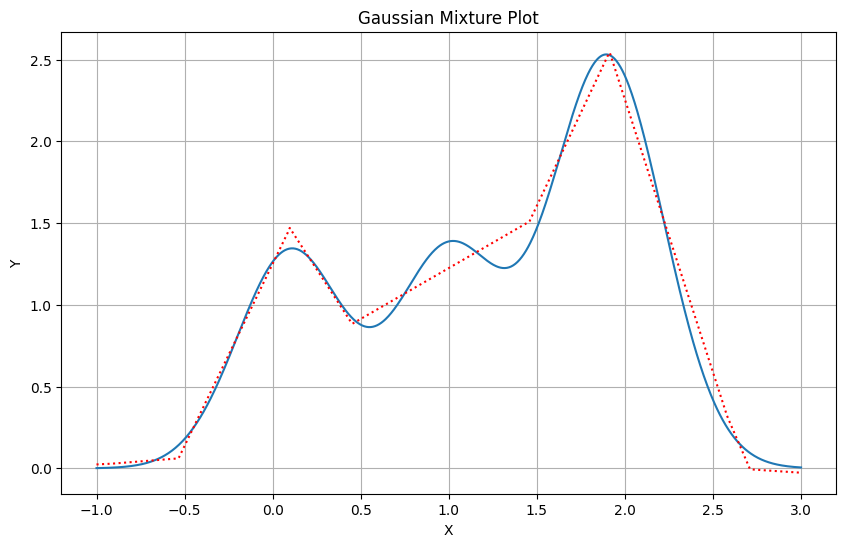

In [86]:
test_X = torch.linspace(-1, 3, 1000)
test_Y = gaussian_mixture(test_X)
model_Y = model(test_X.reshape(-1, 1).to(device))
model_Y = model_Y.cpu()
plt.figure(figsize=(10, 6))
plt.plot(test_X.numpy(), test_Y.numpy(), label='Gaussian Mixture')
plt.plot(test_X.numpy(), model_Y.detach().numpy(), label='Predictions', color='red', linestyle='dotted')
plt.title('Gaussian Mixture Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
